In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ibex = pd.read_csv('data/indexes/Clean dfs/ibex.csv')
ibex['Date'] = pd.to_datetime(ibex['Date'], format='%Y.%m.%d')
ibex.head()

,Date,Last,Open,Max,Min,Vol_K,Var_%,Index
0,2019-10-23,9358.5,9347.5,9380.0,9334.0,NaN,-0.23,IBEX_10years
1,2019-10-22,9380.2,9393.3,9417.4,9344.6,139000.50,-0.24,IBEX_10years
2,2019-10-21,9402.3,9350.3,9424.3,9342.1,167000.99,0.78,IBEX_10years
3,2019-10-18,9329.8,9310.3,9362.2,9307.6,150000.24,-0.11,IBEX_10years
4,2019-10-17,9340.0,9360.9,9494.5,9340.0,195000.29,-0.50,IBEX_10years


In [3]:
import glob
import re

files = glob.glob('data/exchange market/*.csv')

index_names = []
index_list = []
for file in files:
    name = re.findall('\\\(.+).csv', file)
    name_string = ''.join(name)
    index_names.append(name_string)
    index_list.append(name_string)

for i in range(len(index_names)):
    index_names[i] = pd.read_csv('data//exchange market/'+index_names[i]+'.csv', index_col=None, header=0)
    

In [4]:
bitcoin = index_names[0]
eur_cny = index_names[1]
eur_gbp = index_names[2]
eur_usd = index_names[3]

In [5]:
eur_gbp.head()

,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,23.10.2019,"0,8616","0,8638","0,8659","0,8615","-0,30%"
1,22.10.2019,"0,8642","0,8603","0,8646","0,8576","0,45%"
2,21.10.2019,"0,8603","0,8623","0,8662","0,8577","-0,09%"
3,18.10.2019,"0,8611","0,8631","0,8665","0,8599","-0,22%"
4,17.10.2019,"0,8630","0,8629","0,8704","0,8572","0,01%"


In [6]:
index_list

['Bitcoin', 'EUR_CNY', 'EUR_GBP', 'EUR_USD']

In [7]:
def number_formatting(x):
    a = x.replace('.','')
    return a.replace(',','.')


for df in [bitcoin, eur_cny, eur_gbp, eur_usd]:
    
    if 'Vol.' in df.columns:
        df.drop(columns='Vol.', inplace=True)
    df.drop(columns=['Apertura','Máximo', 'Mínimo', '% var.'], inplace=True)
    
    df.columns = ['Date', 'Last']
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
    
    df['Last'] = df['Last'].apply(number_formatting)
    df['Last'] = pd.to_numeric(df['Last'])
    
   
    

In [8]:
bitcoin.head()


,Date,Last
0,2019-10-24,7433.3
1,2019-10-23,7477.0
2,2019-10-22,8031.4
3,2019-10-21,8208.2
4,2019-10-20,8223.4


## Appending exchange to ibex

In [18]:
ibex_base = ibex[['Date', 'Last']]


bitcoin.columns = ['Date', 'Last_bitcoin']
merged_dfs = ibex_base.merge(bitcoin, on='Date')


eur_cny.columns = ['Date', 'Last_eur_cny']
merged_dfs = merged_dfs.merge(eur_cny, on='Date')


eur_gbp.columns = ['Date', 'Last_eur_gbp']
merged_dfs = merged_dfs.merge(eur_gbp, on='Date')


eur_usd.columns = ['Date', 'Last_eur_usd']
merged_dfs = merged_dfs.merge(eur_usd, on='Date')


merged_dfs.head()


,Date,Last,Last_bitcoin,Last_eur_cny,Last_eur_gbp,Last_eur_usd
0,2019-10-23,9358.5,7477.0,7.8661,0.8616,1.1133
1,2019-10-22,9380.2,8031.4,7.8731,0.8642,1.1125
2,2019-10-21,9402.3,8208.2,7.8893,0.8603,1.1149
3,2019-10-18,9329.8,7948.5,7.9109,0.8611,1.1171
4,2019-10-17,9340.0,8073.3,7.8729,0.8630,1.1124


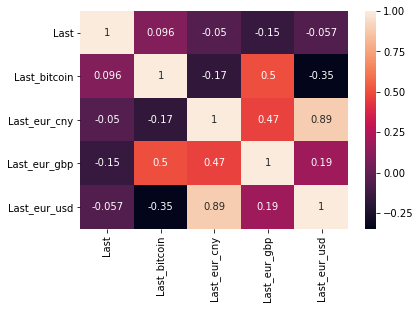

In [19]:
correlation = merged_dfs.corr()


ax=sns.heatmap(correlation, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()